In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from src.data_preprocess import DataPreprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
import trimap
from sklearn.metrics import silhouette_score

In [3]:
###############################
### 1. Data Preprocessing  ###
###############################

# Load dataset
file_path = "data/Load_data_new.csv"
preprocessor = DataPreprocessing()

data = preprocessor.load_data(file_path)

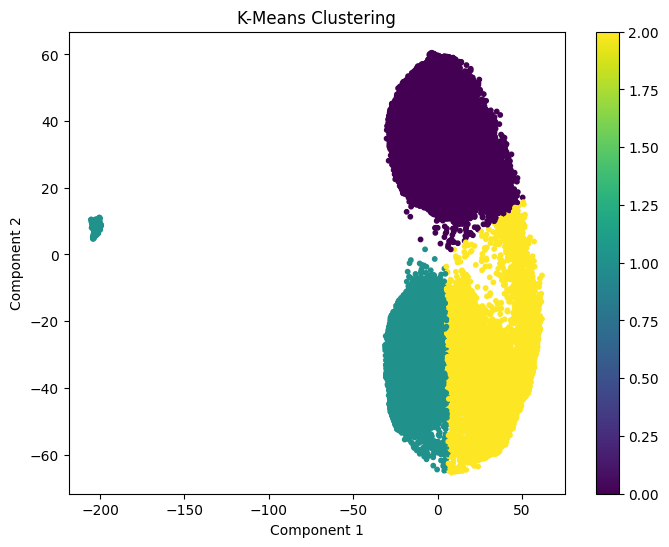

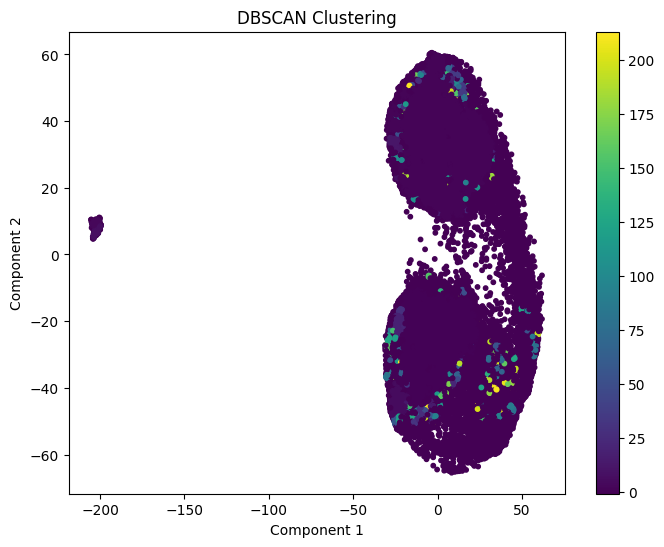

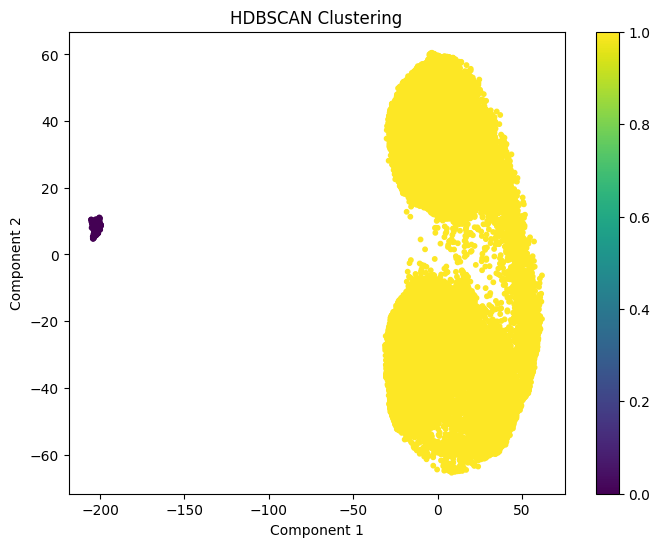

K-Means Silhouette Score: 0.51
DBSCAN Silhouette Score: -0.6440494656562805
HDBSCAN Silhouette Score: 0.774616539478302


In [4]:
#################################
### 2. Data Scaling ###
#################################
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

########################################
### 3. Dimensionality Reduction (TriMap) ###
########################################
trimap_model = trimap.TRIMAP(n_dims=2)
reduced_data = trimap_model.fit_transform(scaled_data)

#################################
### 4. Clustering Algorithms ###
#################################

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(reduced_data)

# HDBSCAN Clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=10)
hdb_labels = hdb.fit_predict(reduced_data)

#################################
### 5. Visualization ###
#################################
save_path = 'plots'
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.savefig(os.path.join(save_path, title + ".png"))
    plt.show()

plot_clusters(reduced_data, kmeans_labels, 'K-Means Clustering')
plot_clusters(reduced_data, dbscan_labels, 'DBSCAN Clustering')
plot_clusters(reduced_data, hdb_labels, 'HDBSCAN Clustering')

#################################
### 6. Evaluation (Silhouette Score) ###
#################################
print(f"K-Means Silhouette Score: {silhouette_score(reduced_data, kmeans_labels):.2f}")
print(f"DBSCAN Silhouette Score: {silhouette_score(reduced_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'}")
print(f"HDBSCAN Silhouette Score: {silhouette_score(reduced_data, hdb_labels) if len(set(hdb_labels)) > 1 else 'N/A'}")